#  <span style="color:#9617FF"> QTM 151 Final Project </span>

#### *Group Members: Brooke Mills, Kaegan Ortlund, Madison Chen, Veronica Vargas*
Section number: 01

## <span style="color:#76a2db"> Introduction </span>
Formula One (F1) is the highest level single seat car racing. Drivers compete in teams of two, with cars from manufacturers - Ferrari, McLaren, RedBull, Mercedes to name a few. The goal of each race is to be the first to cross the finish line after a certain number of laps. Each race is called a Grand Prix and there are a different number every year. Each track is different from the others and occurs in a different country. There are three parts to any race: practice, qualifying rounds, and the race itself. Practice lets drivers test their cars on the track. The Qualifying race has each driver complete laps by themselves to determine starting position. The race is the final and most important piece, where the drivers complete laps totaling up to a certain distance. Drivers are awarded points for both the position they finish in, and whether they set the fastest lap in a race. At the end of the season the points of each driver are totalled up to an overall rank. There are two main competitions in Formula 1: The constructors championship, where the team with the most total points is crowned Constructors Champion, and the Driver's Championship, where the driver with most total points at the end of the season is crowned World Champion. 


A few nations have results which indicate that they are consistently among the top five nations. The Netherlands, Germany, and Britain have the lowest average speeds and the highest mean points and wins. They also tend to have higher standard deviations, although this may be a factor of them having a high number of drivers. Looking over time, there is an amount of variability of these nation’s speeds and standard deviation. Speeds generally declined with some spikes in 2016, 2020, and in the current year. Standard deviations were generally low with spikes in the same years that speeds spiked. On the individual drivers scale, the fastest driver’s, at least in 2022, don’t often belong to the nations with the highest average milliseconds. 

In this analysis, we will first import data from the Formula 1 datasets. We then merge and clean the data to create a dataset which we use to analyze and plot the lap speeds, number of wins, and consistency of drivers by nationality, to determine what country has the best drivers overall.


# <span style="color:#76a2db"> Data Description </span>

* The first dataset we will use is 'Drivers'. Each row represents a driver and there are 857 drivers total in the dataset. This dataset contains information on each drivers ID and reference number, name, data of birth, and nationality. 

* The second dataset we will use is 'Results'. Each row represents a driver at a particular race and there are 25840 observations in the dataset. This dataset contains information on the race ID, the driver number and ID, the starting position, finishing position and time, points earned, and lap speed. 

* The third dataset we will use is 'Driver Standing'. Each row is an observation of a driver at a particular race and there are 33902 observations. This dataset contains information on the race ID, driver ID, position in ranking at end of race, and total number of wins.

* The final data set we will look at is 'Races'. Each row represents a different race in a particular year and there are 1102 observations in the dataset. The years span from 1950 to 2023. This dataset contains information on the raceID, year of race, and name of race.



In [2]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Importing Libraries 
drivers = pd.read_csv("data_raw/drivers.csv")
results = pd.read_csv("data_raw/results.csv")
driver_standing = pd.read_csv("data_raw/driver_standings.csv")
races = pd.read_csv("data_raw/races.csv")

# calculating number of rows in each dataset
print(len(drivers))
print(len(results))
print(len(driver_standing))


857
25840
33902


# <span style="color:#76a2db"> Merging: </span>


To create the final dataset, we first subset the columns from the drivers dataset that we will be using. These are the driver Id, which will be used as the key for merging, and the name of the driver and nationality. Then, we merge the drivers dataset with the results dataset, including only the results columns for driver ID, race ID, lap time, rank, points, and milliseconds. We merge the new dataset with races dataset, including the columns for year, race ID, and name. Finally, we merge this new dataset with the driver standings dataset, including the columns for race ID, number of wins, and position.

In [4]:
#filtering out unnecessary columns from drivers
drivers = drivers[["driverId", "surname", "nationality"]]

In [5]:
### Merging datasets

# Merehe 'Drivers' and 'Results'
merge1 = pd.merge(drivers,
                         results[["driverId", "raceId", "fastestLapTime", "rank", "points", "milliseconds"]],
                         on = "driverId",
                         how = "left")

# Merge with 'Races' dataset to get year, race
merge2 = pd.merge(merge1,
                         races[["year", "raceId", "name"]],
                         on = "raceId",
                         how = "left")

# Merge with 'Driver Standing' to get final dataset 
f1 = pd.merge(merge2,
                         driver_standing[["driverId","wins", "position", "raceId"]],
                         on = ["driverId", "raceId"],
                         how = "left")


# <span style="color:#76a2db"> Data Cleaning: </span>


To prepare the dataset for analysis, we first remove the NAs, which we recorded as a string in the orginial datasets. To do this we replace the NAs with the np.nan value from the library numpy. This allows us to complete analysis on the data without errors from the incalculable NAs. 

Next, we recode the columns for fastest lap and rank. These columns were recorded as strings, but in order to use them in calculations they should be numeric. We first transmute the fastest lap time column to a time value. Then we transmute the rank column to be numeric. Finally, we run a check on column types to ensure that the formating in corrected. 

In [6]:
#Data Cleaning
#replacing NAs in 'fastestLapTime', 'rank', and 'milliseconds columns
f1["fastestLapTime"] = f1["fastestLapTime"].replace('\\N', np.nan)
f1["rank"] = f1["rank"].replace('\\N', np.nan)
f1['milliseconds'] = f1['milliseconds'].replace('\\N', np.nan)

In [7]:
# Data Recoding
f1["rank"] = pd.to_numeric(f1["rank"])
f1["milliseconds"] = pd.to_numeric(f1["milliseconds"])
print(f1.dtypes)

driverId            int64
surname            object
nationality        object
raceId            float64
fastestLapTime     object
rank              float64
points            float64
milliseconds      float64
year              float64
name               object
wins              float64
position          float64
dtype: object


# <span style="color:#76a2db"> Descriptive Statistics: </span>


There are 42 nationalities that have been represented in Formula 1 since 1950, the top 5 being: British (165 drivers), American (158 drivers), Italian (99 drivers), French (73 drivers), and German (50 drivers). 

The nationality with the highest ever number of wins in one season (that is placing 1st) out of around 23 races (which varies per year), is Dutch at 15. Second is German at 13 and third is British at 11. 

Drivers compete to score points at each race, however to score points in Formula 1 a driver must place in the top 10 or set the fastest lap time. Anything below gives zero points. A typical season includes 20 drivers (each team with 2 drivers). This number varies as teams join or leave Formula 1. However, this means that many drivers fail to place in the top 10 during a race and gain zero points. In fact, the nationalities of Malaysia, Indonesia, American-Italian, East German, Czech, Argentine-Italian, Uruguayan, have never seen a driver place in the points. Monegasque drivers score the highest points on average at 6.5, followed by Dutch at 3.2, and Finnish at 3.8. British drivers have the most total points accumulated since 1950 (10,567), followed by German(7,947), and Finnish (4,379). 

Drivers also gain points by setting the fastest lap in a race, given a by placement (rank 1 = fastest, rank 2 = second fastest and so on).Nationalities with highest average rank are Columbian (6th fastest), Monegasque (7th fastest), and Finnish (8th fastest). In other words, thes nationalities have the put out, on average, the fastest, or fast laps.
 
This anlaysis includes the main columns of: 

* Driver ID: A unique code that represents each driver.
* Race ID: A unique code that represents each racetrack.
* Surname: The last name of each driver. 
* Nationality: The country each driver is a citizen of. 
* Rank: For each observation, or race, the rank refers to fastest lap compared to all drivers.
* Year: The season, or year of racing. 
* Name : The name of the circuit, or track.  
* Milliseconds: The finishing time. 
* Wins: The number of total wins a driver has obtained at the up to, and including the race. Note that this is a cumulative value. 
* Position: For each observation, or race, the position of finish (i.e. 1st, 2nd, 3rd, etc.)
* Points: The points given to each driver, determined by position and fastest lap time. 



In [8]:

### How many drivers are in each nationality? 

#subset to get unique driver name 
f1_subset1 = f1.drop_duplicates(subset = "driverId")

#group by and count
f1_agg2 = (f1_subset1.groupby("nationality")
                      .agg(Count = ('surname',len)))
#sort in descending order                      
f1_agg2.sort_values(by = "Count", ascending = False)



,Count
nationality,
British,165
American,158
Italian,99
French,73
German,50
Brazilian,32
Argentine,24
Swiss,23
South African,23


# <span style="color:#76a2db"> Results and Analysis </span>

### Model 1: Examining the consististency of rankings for fastest nations for the last 10 Seasons of F1 Racing

 Context: While being a fast driver is definetly a a good quality, the consistency to maintain a fast speed is also a crucial factor into predicting how well drivers must do to stay competitive. As such, understanding the general trends in nation's speeds, especially when you are the top, is vital to maintain a compeittive edge over others. By assessing milliseconds of the top 5 nations who won across 10 seasons, we will be able to assess how consistent these nations with speed overall. 


In [10]:
#dataset creation that takes year, avg points, 
#and nationality (based off lowest average milliseconds) 
#top 5 are Dutch, German, British, Finnish, Brazilian
consist_df = f1_subset[["year","nationality","milliseconds"]]

consist_stats = (consist_df.groupby(["nationality", "year"])
                      .agg(mean_sec = ('milliseconds','mean'),
                           sd_sec =   ('milliseconds','std'),
                           sum_sec = ('milliseconds', 'sum'))) 

consist_stats =  consist_stats.reset_index() 
#consist_stats should now have avg/sd/sum points per 
#nationality for every year

#taking plotting data of top 5 winners of 2022 and past 5 years
past10 = [2012,2013,2014,2015,2016,2017,2018,2019,2020, 2021,2022]
win5 = ['Dutch', 'German', 'British', 'Finnish', 'Brazilian']
consist_plotdat = consist_stats[(consist_stats['year'].isin(past10))
                                & (consist_stats['nationality'].isin(win5))]
#Change top nations with lowest avg milliseconds 


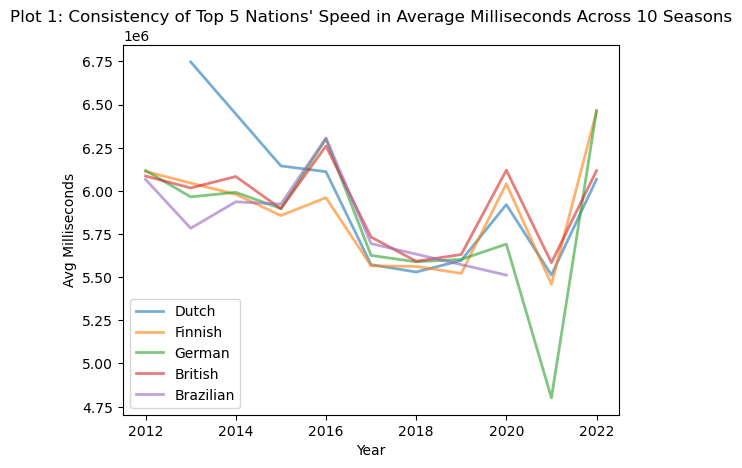

In [42]:
#loop prep 
nationalities = ['Dutch', 'Finnish', 'German', 'British', 'Brazilian']

#to customize: you can add linestyle/color using zip() in the for statement
#making the plot for avg seconds
for nationality in nationalities:
    nationality_data = consist_plotdat.query(f"'{nationality}' == nationality")
    plt.plot(nationality_data["year"], nationality_data["mean_sec"], label=nationality, alpha = 0.6, linewidth = 2.0)
#plot descriptive code 
plt.legend(loc = "best")
plt.title("Plot 1: Consistency of Top 5 Nations' Speed in Average Milliseconds Across 10 Seasons")
plt.xlabel("Year")
plt.ylabel("Avg Milliseconds")
plt.show()


#### Plot 1: Consistency of the Top 5 Nations' Average Milliseconds Across 10 Seasons.

This graph reveals the top five winning nations’ average speed in milliseconds across 10 seasons of F1 racing. From the data, it is noticeable that there seems to be a slight trend of overall declining average speed across all five nations across all 10 years. However, there are noticeable spikes in the trends in 2016 and 2020 to 2022. This could possibly be due to unpredictable circumstances, especially like the COVID pandemic which began in 2020. Notably, Dutch drivers started with the highest average milliseconds and declined the most rapidly from 2012 to 2017. They also didn’t experience the spike in 2016 that the other four nations did. Interestingly, there seems to be an extreme decline in average milliseconds for Germany in 2021, and this may partly be due to any disqualifications or a significant reduction of times per that season.

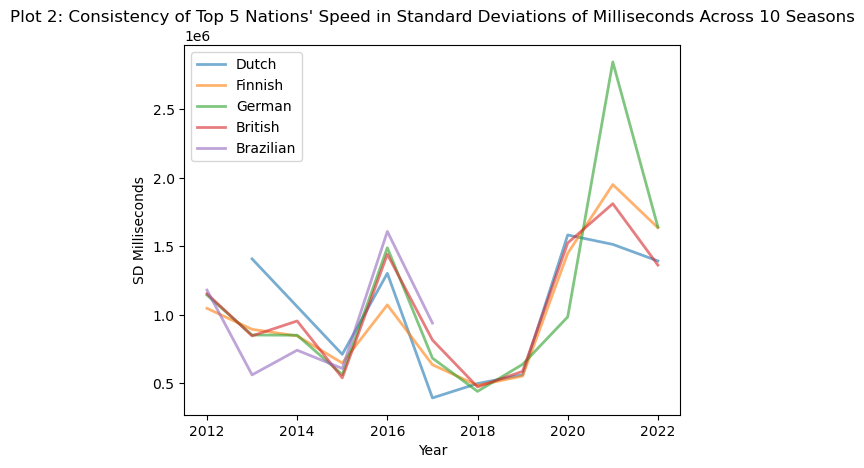

In [43]:
for nationality in nationalities:
    nationality_data = consist_plotdat.query(f"'{nationality}' == nationality")
    plt.plot(nationality_data["year"], nationality_data["sd_sec"], label=nationality,
             alpha = 0.6, linewidth = 2.0)
#plot descriptive code 
plt.legend(loc = "best")
plt.title("Plot 2: Consistency of Top 5 Nations' Speed in Standard Deviations of Milliseconds Across 10 Seasons")
plt.xlabel("Year")
plt.ylabel("SD Milliseconds")
plt.show()

#### Plot 2: Standard Deviation across 10 years for the top 5 nations.

This graph focuses on the change of standard deviation of milliseconds across nations over 10 seasons of F1 formula racing.  From the graph, it is clear there is variation across all nations, with notable increases in deviation in 2016 for all of the top fastest nationalities. Despite having a fairly lower deviation prior to 2017, it is important to note that deviation for milliseconds for Brazilian drivers stopped. This is due to Brazilian driver, Filpe Massa, retiring in 2018 and no other Brazilian drivers entering the Championships after. Another significant trend is the increased deviation for Germany in 2021. This could possibly be due to a change in drivers representing Germany. While the spike in deviation is significant, graph 1 which looks at average milliseconds per nation reveals that Germany did much better than their other races in 2021. Despite the variation across all of the top 5 nations, it is clear that Dutch drivers had the lowest deviations in 2020 to 2022, indicating a better consistency over the last two seasons compared to the other nations across time. 

### Model 2: Investigating the average fastest drivers' milliseconds for the the most recent season (2022)

 Context: After investigating general trends in nations' speed and their consistency to get those specific milliseconds, we chose to focus on the most recent race and look at overall driver's and their speed. These plots reveal how well each individual driver did, where a lower average millisecond and lower standard deviation is considered ideal for being a "fast" driver. We also added each driver's nationality to compare to the general trends seen in plots 1 and 2. 

In [55]:
#separating the data so that we can look at nationality, surname, milliseconds, and year?
speed_df = f1[["year","nationality","surname", "milliseconds"]]
speed_df = speed_df.query("2022 == year")
#grouping by and aggregating the top individuals for the seasons 
speed_indv = (speed_df.groupby(["surname", "nationality"])
                      .agg(mean_secs = ('milliseconds','mean'),
                           sd_secs =   ('milliseconds','std'),
                           sum_secs = ('milliseconds', 'sum'))) 
speed_indv = speed_indv.reset_index()
speed_indv.sort_values(by = 'mean_secs', ascending = True)


,surname,nationality,mean_secs,sd_secs,sum_secs
21,de Vries,Dutch,4.834633e+06,NaN,4834633.0
5,Hülkenberg,German,5.534224e+06,5.419111e+05,11068448.0
0,Albon,Thai,5.721906e+06,3.108663e+05,51497157.0
13,Russell,British,5.926202e+06,1.275349e+06,118524041.0
14,Sainz,Spanish,5.957565e+06,8.903333e+05,95321034.0
10,Ocon,French,5.965586e+06,1.380543e+06,101414961.0
20,Zhou,Chinese,6.125204e+06,1.762085e+06,61252035.0
18,Verstappen,Dutch,6.128455e+06,1.400185e+06,122569097.0
7,Leclerc,Monegasque,6.159435e+06,1.434816e+06,117029266.0
11,Pérez,Mexican,6.165673e+06,1.424615e+06,117147785.0


In [57]:
#nationality by color
cmap = plt.get_cmap('tab20')
nat_uniquenum = len(speed_indv["nationality"].unique())
natcolors = [cmap(i)for i in np.linspace(0,1, nat_uniquenum)]
nat_col_plot = dict(zip(speed_indv["nationality"].unique(), natcolors))
speed_indv["nationality_code"] = speed_indv["nationality"].map(nat_col_plot)

#establishing the legend with nationalities associated to the colors 
legend_handles = []
for nationality, color in nat_col_plot.items():
    legend_handles.append(plt.Line2D([0], [0], marker='o', color='w', label=nationality, 
                                     markersize=10, markerfacecolor=color))

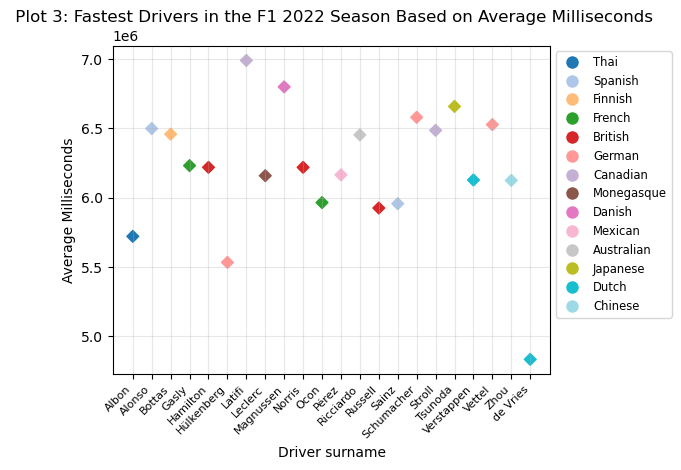

In [58]:
#making a scatterplot 
plt.scatter( x= speed_indv["surname"],
             y= speed_indv["mean_secs"],
             marker = "D",
             c = speed_indv["nationality_code"])
#plot descriptive code 
plt.xticks(rotation= 45, size = 8, ha = "right") 
plt.title(" Plot 3: Fastest Drivers in the F1 2022 Season Based on Average Milliseconds")
plt.xlabel("Driver surname")
plt.ylabel("Average Milliseconds")
plt.legend(handles= legend_handles, loc = "best", fontsize = "small",  bbox_to_anchor=(1, 1))
plt.grid(alpha = 0.3)
plt.tight_layout()
plt.show()

#### Plot 3: Fastest Drivers in the F1 2022 Season Based on Average Milliseconds
Plot 3 reveals the average milliseconds for drivers across the 2022 season for F1 racing. While a majority of the racers' averages fall between 5.9 1e6 to 6.7 1e6 average milliseconds, Albon, Hükenberg, and de Vries all have average milliseconds below everyone else. Especially looking at de Vires, his average speed is significantly lower than the other drivers. This may indicate that he did exceptionally well in the 2022 season, however it could also relate to the disqualifications that de Vires faced during the season and thus has less data to average compared to other drivers. de Vries's low average does correlate with the noticably lower average milliseconds for Dutch drivers seen in Plot 1 for 2022, where de Vries's average would bring the overall Dutch drivers' average milliseconds lower. Overall, based off of the 2022 F1 season, it seems that Thailand, Germany, and the Netherlands have drivers with the fastest average speed. 

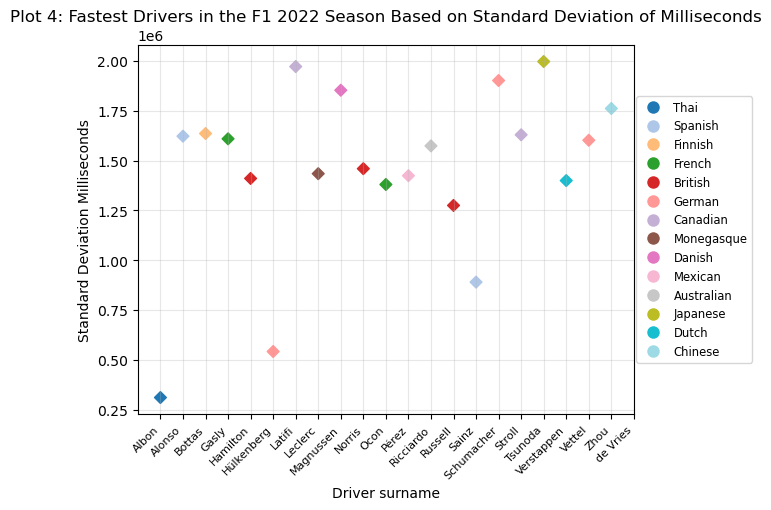

In [59]:
#making a scatterplot for sd of speed per individual drivers
plt.scatter( x= speed_indv["surname"], 
            y= speed_indv["sd_secs"], 
            marker = "D",
            c = speed_indv["nationality_code"])
#plot descriptive code 
plt.xticks(rotation= 45, size = 8, ha = "right") 
plt.title("Plot 4: Fastest Drivers in the F1 2022 Season Based on Standard Deviation of Milliseconds")
plt.xlabel("Driver surname")
plt.ylabel("Standard Deviation Milliseconds")
plt.legend(handles= legend_handles, loc = "center right", fontsize = "small",  bbox_to_anchor=(1.25, 0.5))
plt.grid(alpha = 0.3)
plt.show()

#### Plot 4: Fastest Drivers in the F1 2022 Season Based on Standard Deviation of Milliseconds

Plot 4 coincides with plot 3, where instead of looking at average milliseconds, this plot explores individual drivers' standard deviation for the 2022 season. From the graph, it seems that the majority of drivers have a standard deviation around the 1.25 1e6 to 2.0 1e6 milliseconds; however, Albon, Hülkenberg, and Sainz have notably lower deviations which indicate they were more consistent with their speeds across the season. Interestingly, de Vries's deviation does not appear in the data, which would support his disqualification and reveal that his lower average is not indicative of being a fast driver. In constrast, the Thai driver Albon had a notably low average speed and a low deviation, meaning that he was both fast and consistent with his speed across the entire season. Hülkenberg also had a low average speed and low deviation, meaning he also could be considered one of the fastest drivers for the 2022 season. While the speed and consistency for Germany's drivers coincides with Plots 1 and 2 where they have been historically part of the top 5 nations to win and thus have faster drivers, it is fascinating to see that Thailand may also have one of the fastest drivers yet not be represented in the top 5 nations for F1 racing over 10 seasons.

### Model 3: Investigating the average points by nationality as a measure of performance and consistency.

Context: The following section features a boxplot plotting the average points by nationality as a measure of performance. Here, we subsetting the data by nationality and by year, to investigate the spread of points obtained by each nationality. We used a color-blind friendly color palette to make the data more accessible and created a horizontal boxplot better visualize the average point values. The whiskers show the standard deviation of each nationality as a meaure of consistency while the box indicates overall performance.

In [ ]:
### Aggregating points, rank, and wins by nationality and by year

# creating df with recent years
f1_year_subset = f1.query("(year >= 2012.0) and (year < 2023)")

#subset to get desired columns
f1_subset = f1_year_subset[["nationality","points","rank","wins","year", "milliseconds"]]

#group by and aggregate
f1_agg = (f1_subset.groupby(["nationality","year"])
                      .agg(mean_points = ('points','mean'),
                           sd_points =   ('points','std'),
                           mean_rank = ('rank','mean'),
                           sd_rank = ('rank','std'),
                           mean_wins = ('wins','mean'),
                           sd_wins = ('wins','std'),
                           sum_wins = ('wins', 'sum')))  

# drop NaNs
f1_agg = f1_agg.dropna()

# reset the index values
f1_agg = f1_agg.reset_index()

# display the df
display(f1_agg)   

# extract the df
f1_agg.to_csv("data_clean/f1_agg.csv")


C:\Users\13015\AppData\Local\Temp\ipykernel_11956\479636115.py:52: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


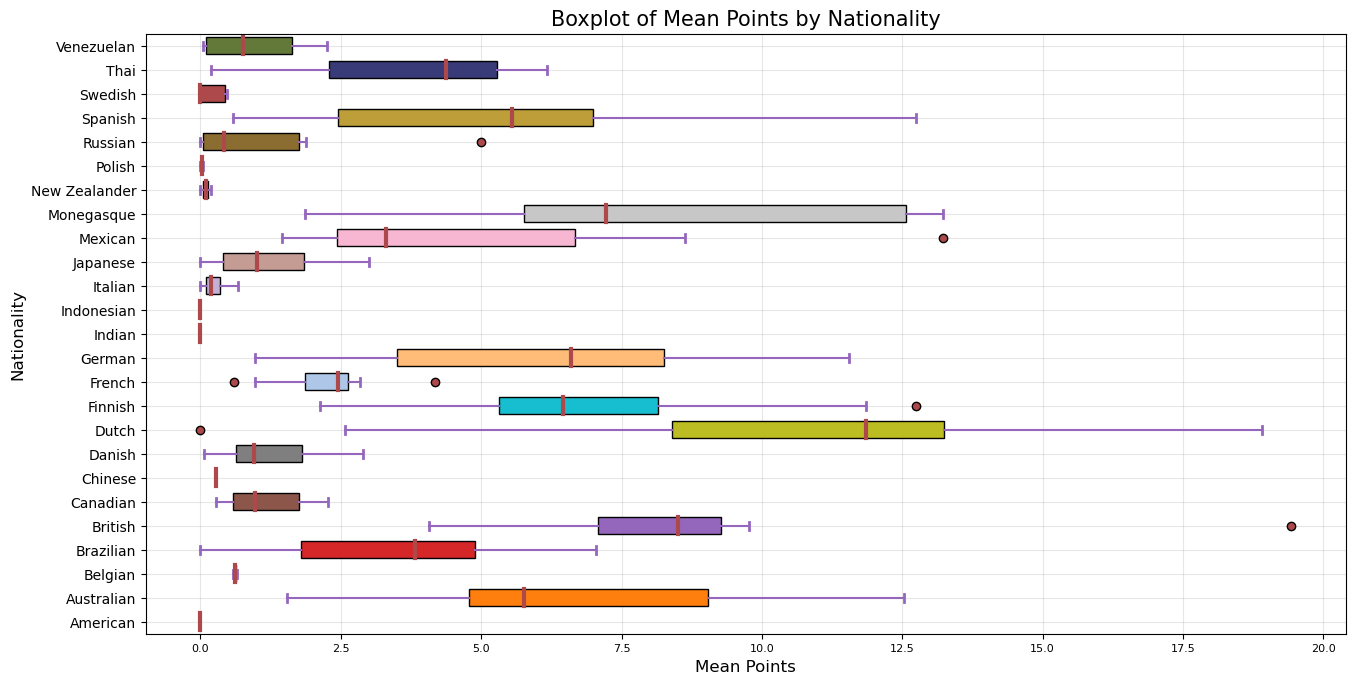

In [19]:
# customized boxplot of mean points by nationality

# creating figure and axis variables
fig = plt.figure(figsize = (12,6))
ax = fig.add_axes([0, 0, 1, 1])

# creating a horizontal boxplot
boxplot = ax.boxplot([f1_agg[f1_agg["nationality"] == nationality]["mean_points"] for nationality in pd.unique(f1_agg["nationality"])],
            labels = pd.unique(f1_agg["nationality"]),
            patch_artist = True,
            widths = 0.7, vert = 0)

# color-blind friendly color-palette
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd",
    "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf",
    "#aec7e8", "#ffbb78", "#98df8a", "#ff9896", "#c5b0d5",
    "#c49c94", "#f7b6d2", "#c7c7c7", "#dbdb8d", "#9edae5",
    "#8c6d31", "#bd9e39", "#ad494a", "#393b79", "#637939"]

# setting a different color for each nationality 
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)
 
# customizing the whiskers
for whisker in boxplot['whiskers']:
    whisker.set(color ='#9467bd',
                linewidth = 1.5,
                linestyle ="-")
 
# customizing the caps
for cap in boxplot['caps']:
    cap.set(color ='#9467bd',
            linewidth = 2)
 
# customizing the medians
for median in boxplot['medians']:
    median.set(color ='#ad494a',
               linewidth = 3)
 
# changing the style of the outliers
for flier in boxplot['fliers']:
    flier.set(marker ='o',
              markerfacecolor ='#ad494a')

# putting labels
plt.ylabel("Nationality", fontsize = 12)
plt.xlabel("Mean Points", fontsize = 12)
plt.title("Boxplot of Mean Points by Nationality", fontsize = 15)
# changing the font size
plt.xticks(fontsize=8)
plt.grid(alpha = 0.3)
plt.tight_layout()
plt.show()


#### Plot 5: Performance determined by average points and standard deviation by nationality
This boxplot shows that the Dutch scored the highest median of points, featuring a wide standard deviation. Therefore, while Dutch had the best performance, they were not very consistent. This makes sense because a higher quantity of obtained points likely features higher observed values which are more likely to be offset by anything below them. Inversely, we see that the nationalited that obtained a lower point average have a smaller standard deviation. Therefore, we conclude that consistency is an imperfect method of determining overall performance. 

In [18]:
### Aggregating points, rank, and wins by nationality ONLY

#group by and aggregate
f1_agg_nat = (f1_subset.groupby("nationality")
                      .agg(mean_points = ('points','mean'),
                           sd_points =   ('points','std'),
                           mean_rank = ('rank','mean'),
                           sd_rank = ('rank','std'),
                           mean_wins = ('wins','mean'),
                           sd_wins = ('wins','std'),
                           sum_wins = ('wins', 'sum')))  

# drop NaNs
f1_agg_nat = f1_agg_nat.dropna() 

# reset the index
f1_agg_nat = f1_agg_nat.reset_index()

# extract the df
f1_agg_nat.to_csv("data_clean/f1_agg_nat.csv")

# display the df
display(f1_agg_nat) 


,nationality,mean_points,sd_points,mean_rank,sd_rank,mean_wins,sd_wins,sum_wins
0,American,0.000000,0.000000,18.200000,1.483240,0.000000,0.000000,0.0
1,Australian,6.480769,7.068038,8.638462,5.579200,0.461538,0.811632,120.0
2,Belgian,0.604651,1.529699,12.348837,4.513914,0.000000,0.000000,0.0
3,Brazilian,3.603352,5.184700,10.156425,5.163408,0.000000,0.000000,0.0
4,British,7.973171,9.353343,8.991870,6.434961,1.434146,2.720139,882.0
5,Canadian,1.109290,2.837944,12.573770,5.075666,0.000000,0.000000,0.0
6,Chinese,0.272727,0.882735,11.818182,5.917177,0.000000,0.000000,0.0
7,Danish,1.260563,2.771894,12.161972,5.481933,0.000000,0.000000,0.0
8,Dutch,10.849727,9.513760,6.459016,5.853262,1.972678,3.223253,361.0
9,Finnish,7.349282,7.451040,7.858852,5.430766,0.318182,0.707415,133.0


### Model 4: Investigating the average wins and standard deviation of wins by nationality to determine performance
Context: The following boxplots visualize the average number of wins by nationality with the supplemental graph showing the standard deviation of those wins. The standard deviation is used as a measure of concistency where nationalities that are more consistent are considered to have a better performance.

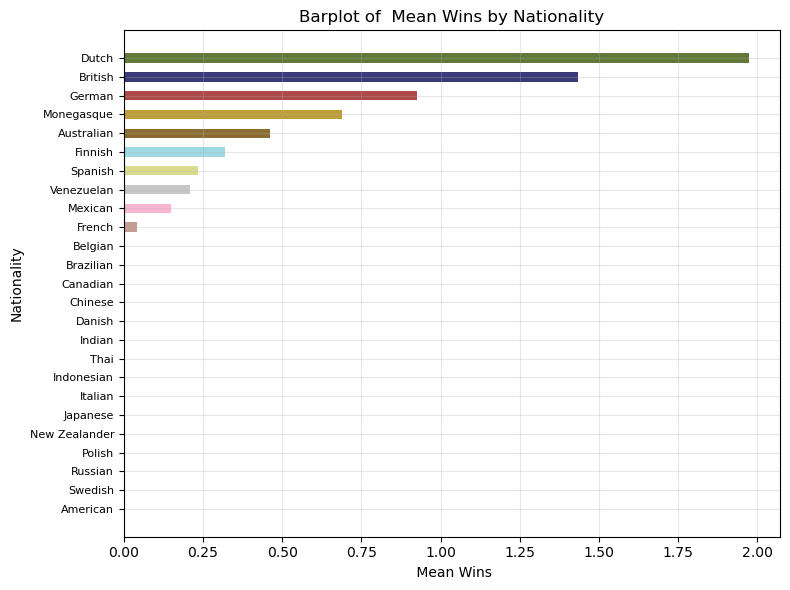

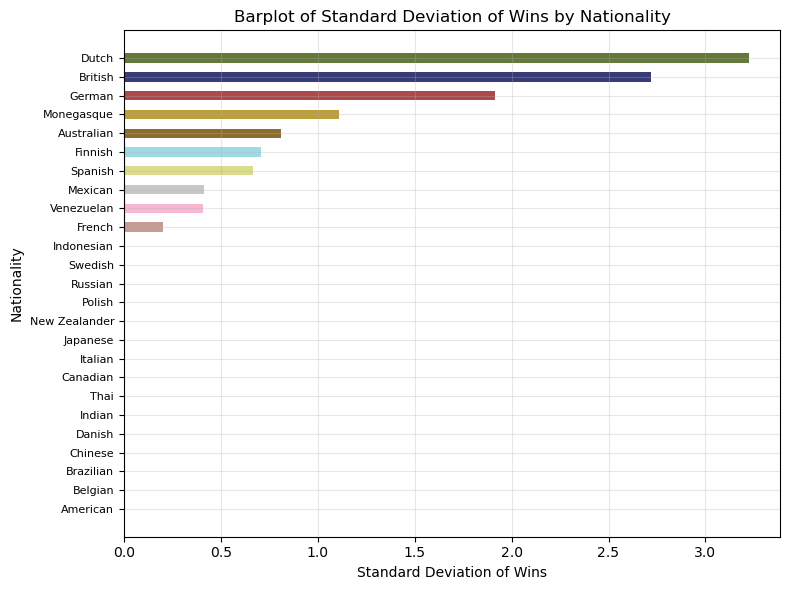

In [20]:
# create a list of the variables in the df
list_variables = ["mean_wins","sd_wins"]
list_strings = [" Mean Wins", "Standard Deviation of Wins"]

# color-blind friendly color-palette
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd",
    "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf",
    "#aec7e8", "#ffbb78", "#98df8a", "#ff9896", "#c5b0d5",
    "#c49c94", "#f7b6d2", "#c7c7c7", "#dbdb8d", "#9edae5",
    "#8c6d31", "#bd9e39", "#ad494a", "#393b79", "#637939"]

# use for loop to create multiple graphs

index = 1
for vars_name, string in zip(list_variables, list_strings):
    # sorting values in order
    f1_agg_nat.sort_values(vars_name,inplace=True)
    plt.figure(figsize = (8, 6))
    plt.barh(f1_agg_nat["nationality"], f1_agg_nat[vars_name],
         color = colors, height = 0.5)
    plt.ylabel("Nationality")
    plt.xlabel(string)
    plt.title("Barplot of" + " " + string + " " + "by Nationality")
    plt.yticks(fontsize=8)
    plt.grid(alpha = 0.3)
    plt.tight_layout()
    plt.show()
    index = index + 1
    

#### Plot 6: Visualizing the average number of wins by nationality
Here we see that the Dutch scored the highest average number of wins. Furthermore, we see that only 10 nations have scored wins in the past 10 years.
 
#### Plot 7: Visualizing the standard deviation of wins by nationality
Again, we see that the Dutch not only scored the highest average number of wins, but we also see that they have the highest standard deviation. That makes sense because a higher average performance will make make it so that lower observed values are considered outliers. Therfore, we see an positive relationship between average wins and standard deviation of wins. As such, following from our previous section, we can conclude that consistency is a misleading indicator of performance

# <span style="color:#76a2db"> Conclusion and Discussion </span>

To determine the nationality with the “best” driver”, this analysis included explorations of wins, points, and milliseconds across periods of time. Although individual analysis highlights identifiable trends, it is clear that determination of the “best” driver is a complex question dependent on a multitude of factors that interact with each other. From this data, it could be argued that there was an overall and slight decrease in average milliseconds across all of the top 5 nations until 2022. The standard deviation in speed across these years seem to follow the trends expected with average milliseconds, where spikes in deviation correlate with either jumps or dips in average speed across all nations. We assumed originally that there would be enough consistency across all years to fully assess which nation is the most consistent with their speed, but the data reveal that there is much more variation per nation than expected. However, this indicates how significant every millisecond is for securing a winning rank and position for a nation overall. Overall Formula 1 seasons the Dutch, British, and German drivers have the most wins and points with lowest mean times. It is important to note that England and Germany have a significantly larger number of drivers who have participated in Formula 1. However, when looking at individual drivers, other nationalities stand out. Visible trends are often determined by outside factors, independent of what constitutes the “best” driver, and should be taken into consideration. For instance, Thai driver Alex Albon was both fast and consistent, but drivers for Williams Racing, a team that fails to produce cars that perform at the top. Conclusively, we see that in order to determine the best drivers, it is more accurate to look at points, milliseconds, and wins. By observing each of these three categories, we can confirm that the Dutch nationality featured some of the best drivers. 